In [1]:
import rocketpy
from rocketpy import Environment, Rocket, Flight, SolidMotor 
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import datetime
import matplotlib.pyplot as plt

# Environment

In [2]:
env = Environment(
    latitude = -21.90795,
    longitude = -48.96156,
    elevation = 495,
)

date = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (date.year, date.month, date.day, 12), 
    timezone="America/Sao_Paulo"
)


env.set_atmospheric_model(
    type="custom_atmosphere",
    wind_u=[
        (0, 2.778), 
        (2000, 2.778) 
    ],
    wind_v=[
        (0, 0), 
        (2000, 0), 
    ],
)
env.max_expected_height = 2000



Gravity Details

Acceleration of gravity at surface level:    9.7860 m/s²
Acceleration of gravity at   2.000 km (ASL): 9.7813 m/s²


Launch Site Details

Launch Date: 2025-10-05 15:00:00 UTC | 2025-10-05 12:00:00 America/Sao_Paulo
Launch Site Latitude: -21.90795°
Launch Site Longitude: -48.96156°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 90584.06 W    7572074.74 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 495.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 2.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 2.78 m/s
Surface Wind Direction: 270.00°
Surface Wind Heading: 90.00°
Surface Pressure: 955.47 hPa
Surface Temperature: 284.94 K
Surface Air Density: 1.168 kg/m³
Surface Speed of Sound: 338.26 m/s


Earth Model Details

Earth Radius at Launch site: 6375.18 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



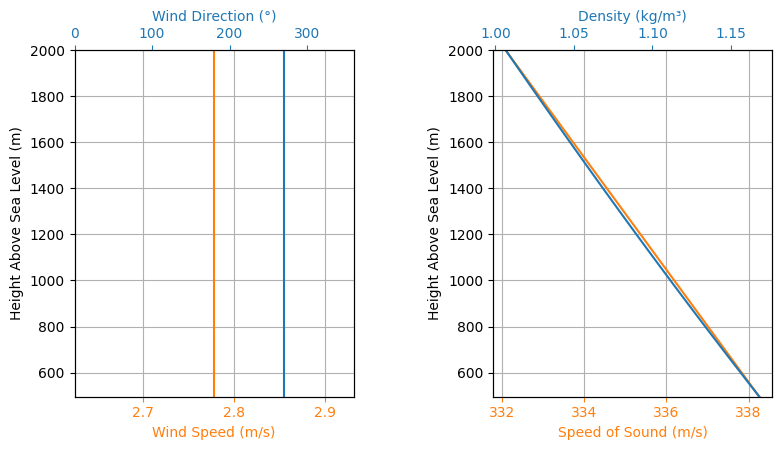

In [3]:
env.info()

# Solid Motor

In [4]:
Rocket_motor_1km = SolidMotor(
    thrust_source="thrust_time.csv",
    dry_mass = 2.30,
    dry_inertia = (0.0172, 0.0172, 0.0027),
    nozzle_radius= 14.7/1000,
    grain_number= 2,
    grain_density = 1700,
    grain_outer_radius = 36 / 1000,
    grain_initial_inner_radius = 7.5 / 1000,
    grain_initial_height = 110 / 1000,
    grain_separation = 1 / 1000,
    grains_center_of_mass_position = 150.5 / 1000,
    center_of_dry_mass_position = 120.7 / 1000,
    nozzle_position= 0,
    burn_time= 3.5,
    throat_radius= 5.5/1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.0147 m
Nozzle Throat Radius: 0.0055 m

Grain Details
Number of Grains: 2
Grain Spacing: 0.001 m
Grain Density: 1700 kg/m3
Grain Outer Radius: 0.036 m
Grain Inner Radius: 0.0075 m
Grain Height: 0.11 m
Grain Volume: 0.000 m3
Grain Mass: 0.728 kg

Motor Details
Total Burning Time: 3.5 s
Total Propellant Mass: 1.457 kg
Structural Mass Ratio: 0.612
Average Propellant Exhaust Velocity: 1003.380 m/s
Average Thrust: 417.593 N
Maximum Thrust: 455.32161 N at 2.4 s after ignition.
Total Impulse: 1461.574 Ns



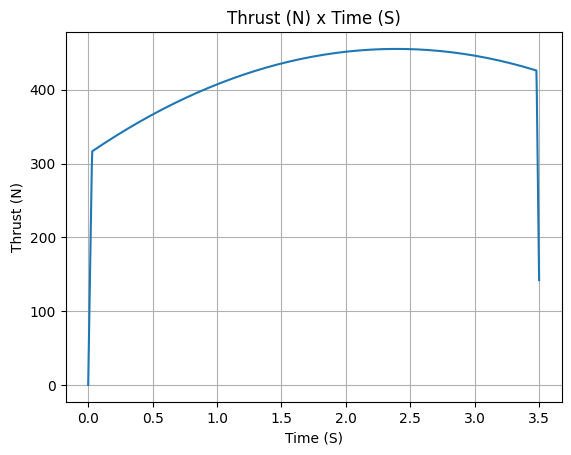

In [5]:
Rocket_motor_1km.info()

# Rocket

In [6]:
df = pd.read_csv("cd_mach.DAT")

cd_off_func = interp1d(df["mach"], df["cd_off"], fill_value="extrapolate")
cd_on_func  = interp1d(df["mach"], df["cd_on"],  fill_value="extrapolate")

In [7]:
Rocket_1km = Rocket(
    radius= 37.50/1000,
    mass= 5.2,
    inertia=(0.534, 0.534, 0.031), 
    power_off_drag= cd_off_func,
    power_on_drag= cd_on_func,
    center_of_mass_without_motor= 0.77, 
    coordinate_system_orientation="tail_to_nose",
)

Rocket_1km.add_motor(Rocket_motor_1km, position = -26 / 1000)

## AED

In [8]:
nose_cone = Rocket_1km.add_nose(
    length= 213.6/1000, kind="elliptical", position= 1522.7 /1000,
)

fin_set = Rocket_1km.add_trapezoidal_fins(
    n=4,
    root_chord = 126.2/ 1000,
    tip_chord = 60.2 / 1000,
    span= 65 / 1000,
    position= 125 / 1000,
    cant_angle = 0,
)

Identification of the AeroSurface:
----------------------------------
Name: Fins
Python Class: <class 'rocketpy.rocket.aero_surface.fins.trapezoidal_fins.TrapezoidalFins'>

Geometric information of the fin set:
-------------------------------------
Number of fins: 4
Reference rocket radius: 0.037 m
Tip chord: 0.060 m
Root chord: 0.126 m
Span: 0.065 m
Cant angle: 0.000 ° or 0.000 rad
Longitudinal section area: 0.006 m²
Aspect ratio: 1.395 
Gamma_c: 0.470 m
Mean aerodynamic chord: 0.029 m

Roll information of the fin set:
--------------------------------
Geometric constant: 0.000 m
Damping interference factor: 1.231 rad
Forcing interference factor: 0.935 rad

Lift information of the fin set:
--------------------------------
Lift interference factor: 1.366 m
Center of Pressure position in local coordinates: (0.000, 0.000, 0.053)
Lift Coefficient derivative (single fin) at Mach 0 and AoA 0: 2.648
Lift Coefficient derivative (fin set) at Mach 0 and AoA 0: 7.232


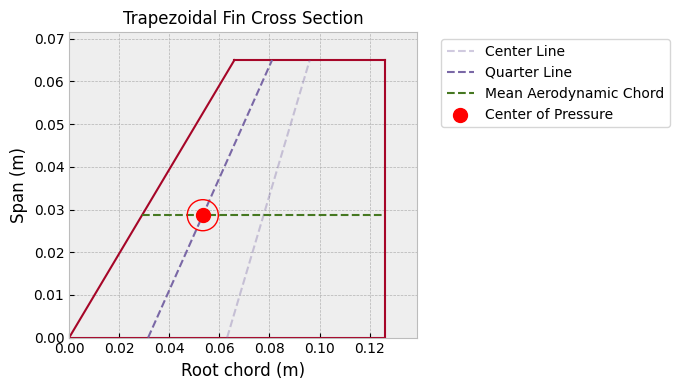

Roll parameters:


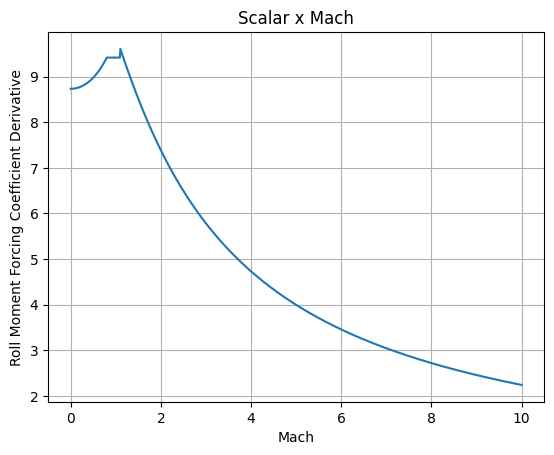

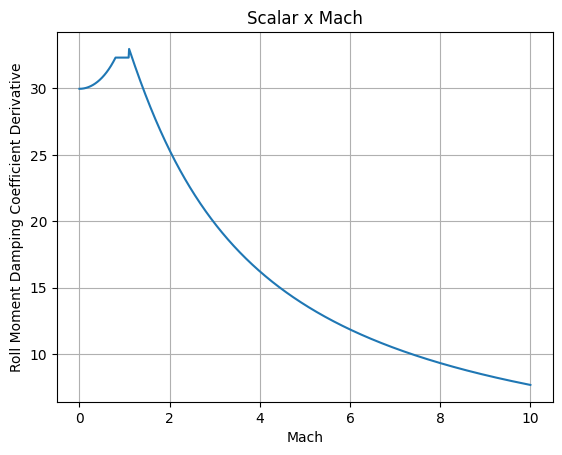

Lift coefficient:


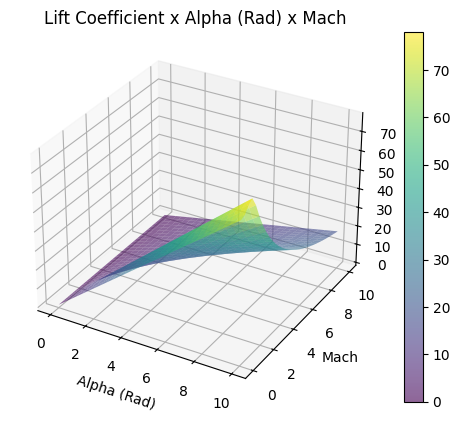

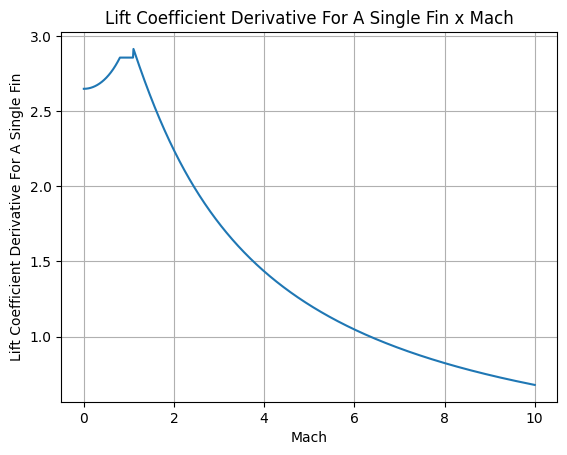

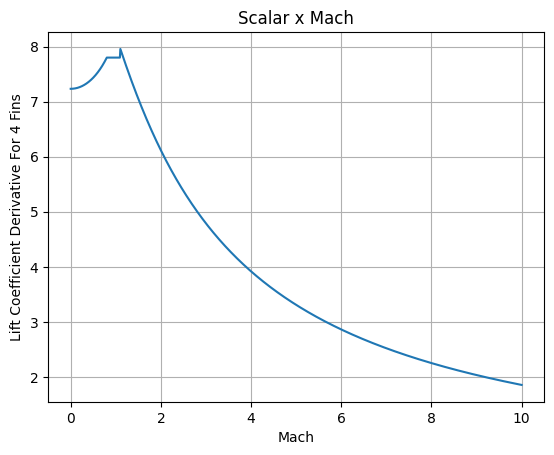

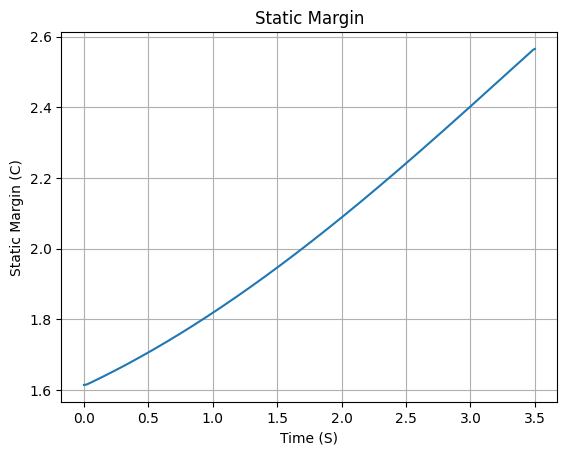

In [9]:
fin_set.all_info()
Rocket_1km.plots.static_margin()

## REC

In [10]:
def usar_paraquedas():
    Rocket_1km.add_parachute(
        name="main",
        cd_s=1.5*np.pi,
        trigger="apogee",
        sampling_rate=100
        )

# Esquema Do Foguete

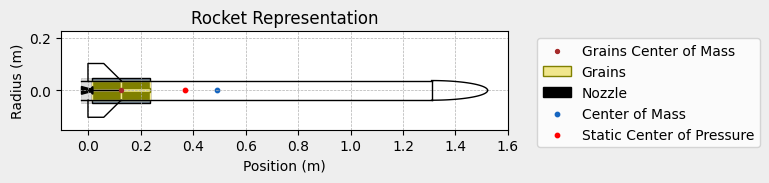

In [11]:
Rocket_1km.draw()

# Flight

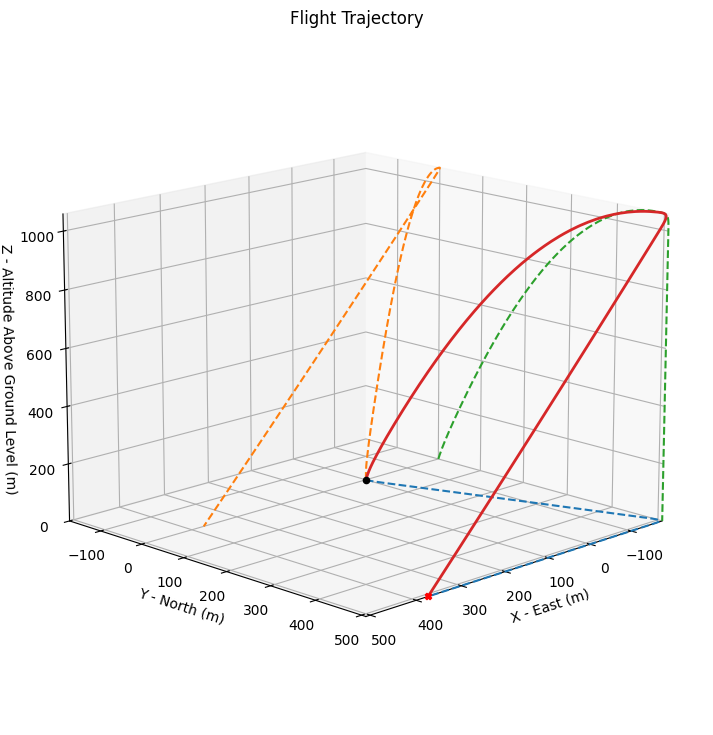


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 495.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.996 | e1: -0.087 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -10.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 1.614 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: -2.78 m/s


Launch Rail

Launch Rail Length: 4 m
Launch Rail Inclination: 80.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.554 s
Rail Departure Velocity: 15.629 m/s
Rail Departure Stability Margin: 1.718 c
Rail Departure Angle of Attack: 10.079°
Rail Departure Thrust-Weight Ratio: 4.318
Rail Departure Reynolds Number: 7.842e+04


Burn out State

Burn out time: 3.500 s
Altitude at burn out: 715.411 m (ASL) | 220.411 m (AGL)
Rocket speed at burn out: 141.789 m/s
Freestream velocity

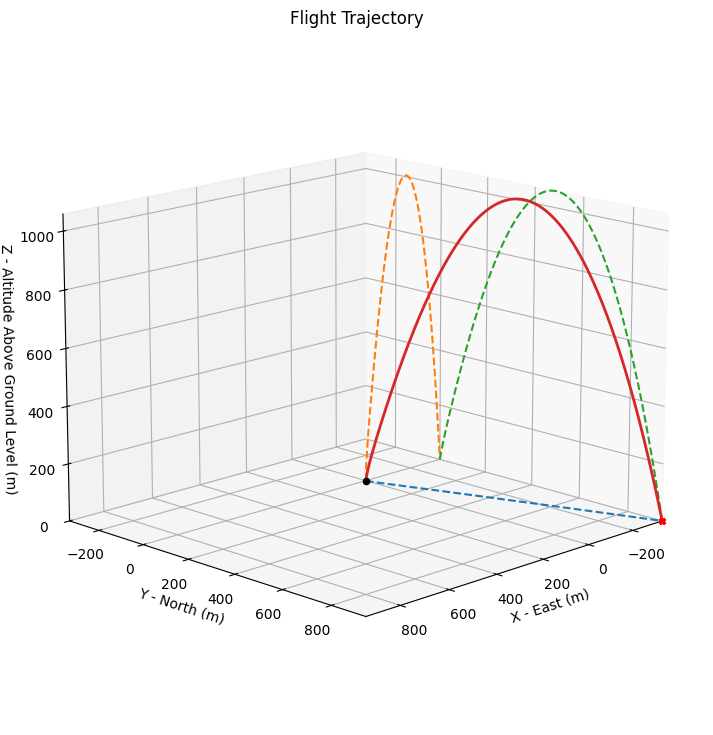

In [12]:
test_flight_balistic = Flight(
    rocket=Rocket_1km, environment=env, rail_length=4, inclination=80, heading=0
    )

usar_paraquedas()

test_flight = Flight(
    rocket=Rocket_1km, environment=env, rail_length=4, inclination=80, heading=0
    )

test_flight.plots.trajectory_3d()
test_flight.prints.all()
test_flight_balistic.plots.trajectory_3d()

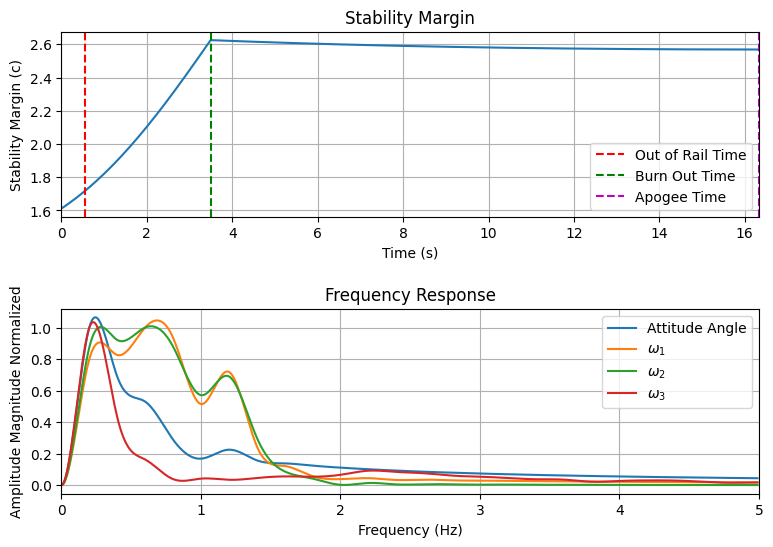

In [13]:
test_flight.plots.stability_and_control_data()

### Export data

In [14]:
test_flight.export_data(
    "Rocket_1km.csv",
    "angle_of_attack",
    "mach_number",
    time_step=1,
)

test_flight_balistic.export_data(
    "Rocket_1km.csv",
    "angle_of_attack",
    "mach_number",
    "altitude",
    time_step=1,
)

test_flight.plots.trajectory_3d(filename="trajectory_plot_1km.jpg")
test_flight_balistic.plots.trajectory_3d(filename="trajectory_plot_1km_balistic.jpg")

# Flutter analysis

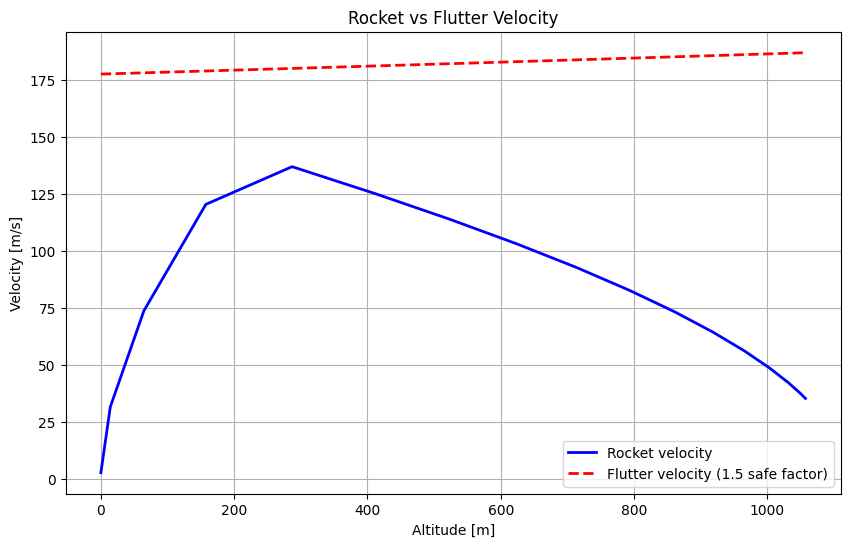

In [15]:
T0_K = 288.15
P0_Pa = 101325.0
g0 = 9.80665
R = 287.05287
L_K_m = -0.0065
H_tropo = 11000.0

def T_K(alt_m):
    if alt_m < H_tropo:
        T = T0_K + L_K_m * alt_m
    else:
        T = 216.65
    return T

def p_Pa(alt_m):
    T = T_K(alt_m)
    if alt_m < H_tropo:
        P = P0_Pa * (T / T0_K)**(-g0 / (L_K_m * R))
    else:
        P_tropo = 22632.1
        T_tropo = 216.65
        P = P_tropo * np.exp(-g0 * (alt_m - H_tropo) / (R * T_tropo))
    return P

def a_m_s(T_K):
    gamma = 1.4
    return np.sqrt(gamma * R * T_K)


def flutter_velocity(alt: float) -> float:
    G = 3.8e6
    t = 2 / 1000
    c_t = 60.172 / 1000 
    c = 125.172 / 1000 
    b = 65.000 / 1000
    
    S = (c + c_t) * b / 2
    A = b**2 / S
    P = p_Pa(alt)
    P_0 = P0_Pa
    temp_K = T_K(alt)
    a = a_m_s(temp_K)
    l = c_t / c
    
    termo_raiz_num = G * ((t/c)**3) * (A + 2)
    termo_raiz_den = (270.552 * (A**3)) * ((l + 1) / 2) * (P / P_0)
    
    Vf = a * np.sqrt(termo_raiz_num / termo_raiz_den)
    
    return 0.67 * Vf


df = pd.read_csv("Rocket_1km.csv", nrows=17)

altitude = df[" Altitude AGL (m)"].values
mach_number = df[" Mach Number"].values

velocity_of_sound_at_alt = np.array([a_m_s(T_K(h)) for h in altitude])
velocity = mach_number * velocity_of_sound_at_alt

flutter = np.array([flutter_velocity(h) for h in altitude])

plt.figure(figsize=(10, 6))

plt.plot(
    altitude, velocity,
    label="Rocket velocity",
    color="blue",
    linewidth=2
)

plt.plot(
    altitude, flutter,
    label="Flutter velocity (1.5 safe factor)",
    color="red",
    linestyle='--',
    linewidth=2
)

plt.xlabel("Altitude [m]")
plt.ylabel("Velocity [m/s]")
plt.title("Rocket vs Flutter Velocity")
plt.legend()
plt.grid(True)
plt.show()